1. Import Libraries

In [ ]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

# Set plot size and style
rcParams['figure.figsize'] = 8, 6
sb.set()


2. Fetch Historical Stock Data

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical data
data = yf.download('AMZN', start='2020-01-01', end='2024-01-01')

# Display the first few rows of the data
print(data.head())

# Plot the closing prices
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.title('Amazon (AMZN) Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


3. Calculate Moving Average and Standard Deviation

In [4]:
# Define window size for moving average and standard deviation
window = 20

# Calculate moving average and standard deviation
data['Moving_Avg'] = data['Close'].rolling(window=window).mean()
data['Rolling_Std'] = data['Close'].rolling(window=window).std()

# Define z-score for reversion threshold
data['Z_Score'] = (data['Close'] - data['Moving_Avg']) / data['Rolling_Std']


4. Generate Trading Signals


In [5]:
# Define thresholds for mean reversion
upper_threshold = 2
lower_threshold = -2

# Generate buy/sell signals
data['Buy_Signal'] = np.where(data['Z_Score'] < lower_threshold, 1, 0)
data['Sell_Signal'] = np.where(data['Z_Score'] > upper_threshold, 1, 0)


5. Visualize the Results

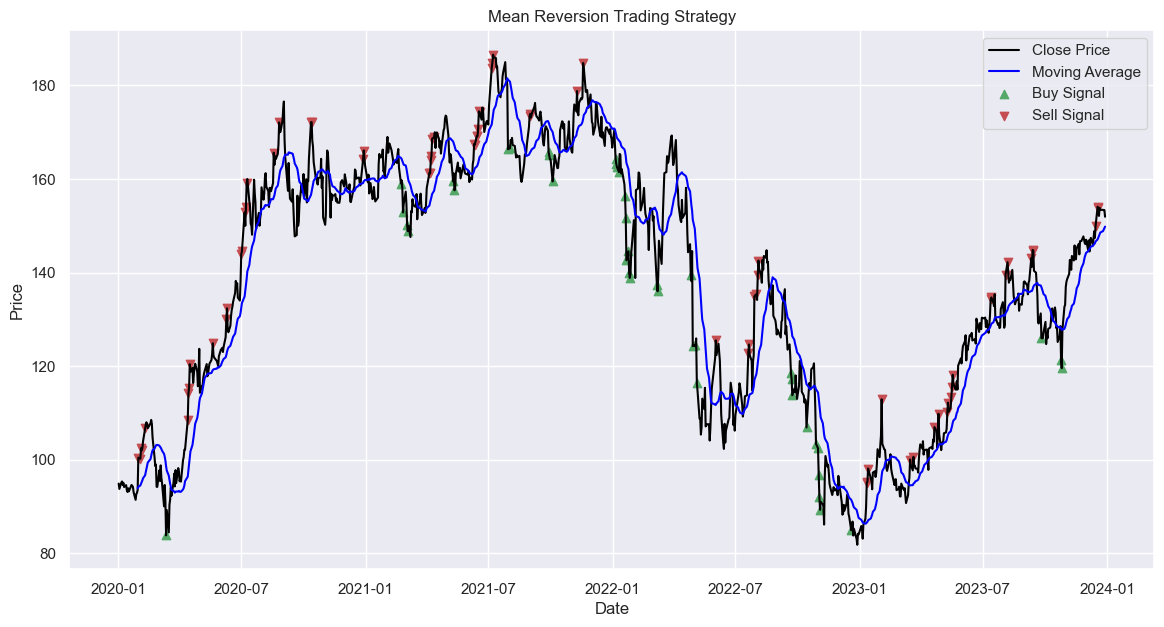

In [7]:
plt.figure(figsize=(14, 7))

# Plot closing price and moving average
plt.plot(data.index, data['Close'], label='Close Price', color='black')
plt.plot(data.index, data['Moving_Avg'], label='Moving Average', color='blue')

# Plot buy/sell signals
plt.scatter(data.index[data['Buy_Signal'] == 1], data['Close'][data['Buy_Signal'] == 1], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(data.index[data['Sell_Signal'] == 1], data['Close'][data['Sell_Signal'] == 1], marker='v', color='r', label='Sell Signal', alpha=1)

plt.title('Mean Reversion Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
